In [18]:
# install pycaret
!pip install git+https://github.com/beingmechon/pycaret.git --quiet
!pip install -qqq ydata-profiling python-multipart uvicorn fastapi openai tiktoken

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.7/45.7 kB 2.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.5/59.5 kB 3.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 92.9/92.9 kB 6.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.0/77.0 kB 6.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 13.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 8.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.0/67.0 kB 8.5 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
llmx 0.0.15a0 requires cohere, which is not installed.


In [19]:
#### Import Libraries ####
import pandas as pd
import numpy as np
from pycaret.regression import *
from datetime import datetime

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

# loading sample dataset
from pycaret.datasets import get_data
data = get_data('diamond')



,Carat Weight,Cut,Color,Clarity,Polish,Symmetry,Report,Price
0,1.10,Ideal,H,SI1,VG,EX,GIA,5169
1,0.83,Ideal,H,VS1,ID,ID,AGSL,3470
2,0.85,Ideal,H,SI1,EX,EX,GIA,3183
3,0.91,Ideal,E,SI1,VG,VG,GIA,4370
4,0.83,Ideal,G,SI1,EX,EX,GIA,3171


# EDA

In [20]:
dataset = get_data('diamond', profile=True)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [64]:
data = dataset.sample(frac=0.9, random_state=786)
data_unseen = dataset.drop(data.index)

data.reset_index(drop=True, inplace=True)
data_unseen.reset_index(drop=True, inplace=True)

print('Data for Modeling: ' + str(data.shape))
print('Unseen Data For Predictions ' + str(data_unseen.shape))

Data for Modeling: (5400, 8)
Unseen Data For Predictions (600, 8)


In [24]:
# # Define target variable
# target = 'Price'

# # define X and y
# X = data.drop(columns=target)
# y = data[target]

# # Split the data into training and testing sets with a 70-30 split
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# df_train = X_train.join(y_train)
# df_test = X_test.join(y_test)

# numeric_features = ['Carat Weight']

In [23]:
df_test.head()

,Carat Weight,Cut,Color,Clarity,Polish,Symmetry,Report,Price
2476,1.01,Good,E,VS1,G,G,GIA,6509
1047,1.04,Ideal,F,SI1,G,G,GIA,5145
3164,1.57,Very Good,H,VVS2,VG,EX,GIA,13516
2372,0.88,Ideal,E,VS2,EX,EX,GIA,5595
2107,1.60,Ideal,H,SI1,VG,VG,GIA,10408


# Processing

In [25]:
# initialize setup

exp_reg102 = setup(data = data, target = 'Price',
                   session_id=123,
                   normalize = True,
                   transformation = True, transform_target = True,
                   remove_multicollinearity = True, multicollinearity_threshold = 0.95,
                   bin_numeric_features = numeric_features,
                   experiment_name = 'diamond1'
                  )

,Description,Value
0,Session id,123
1,Target,Price
2,Target type,Regression
3,Original data shape,"(5400, 8)"
4,Transformed data shape,"(5400, 28)"
5,Transformed train set shape,"(3779, 28)"
6,Transformed test set shape,"(1621, 28)"
7,Ordinal features,1
8,Numeric features,1
9,Categorical features,6


In [26]:
best = compare_models(exclude = ['ransac'])

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
gbr,Gradient Boosting Regressor,0.0066,0.0001,0.0086,0.8592,0.0024,0.0026,0.1820
lightgbm,Light Gradient Boosting Machine,0.0065,0.0001,0.0086,0.8579,0.0024,0.0025,0.2750
xgboost,Extreme Gradient Boosting,0.0066,0.0001,0.0087,0.8551,0.0024,0.0025,0.1900
rf,Random Forest Regressor,0.0068,0.0001,0.0092,0.8375,0.0026,0.0026,0.3720
br,Bayesian Ridge,0.0081,0.0001,0.0098,0.8159,0.0027,0.0031,0.2890
ridge,Ridge Regression,0.0080,0.0001,0.0098,0.8158,0.0027,0.0031,0.1780
lr,Linear Regression,0.0081,0.0001,0.0098,0.8153,0.0028,0.0031,0.6530
et,Extra Trees Regressor,0.0072,0.0001,0.0100,0.8108,0.0028,0.0028,0.2330
dt,Decision Tree Regressor,0.0072,0.0001,0.0100,0.8106,0.0028,0.0028,0.1860
huber,Huber Regressor,0.0078,0.0001,0.0100,0.8099,0.0028,0.0030,0.1970


Processing:   0%|          | 0/77 [00:00<?, ?it/s]

In [28]:
# Pycaret top 3 models to analyze
best_model = compare_models(include = ['rf','xgboost','lightgbm','gbr', 'ridge'],errors='raise', n_select=3)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
gbr,Gradient Boosting Regressor,0.0066,0.0001,0.0086,0.8592,0.0024,0.0026,0.1800
lightgbm,Light Gradient Boosting Machine,0.0065,0.0001,0.0086,0.8579,0.0024,0.0025,0.4400
xgboost,Extreme Gradient Boosting,0.0066,0.0001,0.0087,0.8551,0.0024,0.0025,0.2300
rf,Random Forest Regressor,0.0068,0.0001,0.0092,0.8375,0.0026,0.0026,0.5390
ridge,Ridge Regression,0.0080,0.0001,0.0098,0.8158,0.0027,0.0031,0.1760


Processing:   0%|          | 0/27 [00:00<?, ?it/s]

In [30]:
best_model

[GradientBoostingRegressor(random_state=123),
 LGBMRegressor(n_jobs=-1, random_state=123),
 XGBRegressor(base_score=None, booster='gbtree', callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=-1,
              num_parallel_tree=None, random_state=123, ...)]

In [54]:
model_leaf = create_model('lightgbm')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.0065,0.0001,0.0087,0.8440,0.0024,0.0025
1,0.0067,0.0001,0.0088,0.8605,0.0025,0.0026
2,0.0070,0.0001,0.0093,0.8499,0.0026,0.0027
3,0.0059,0.0001,0.0076,0.8728,0.0022,0.0023
4,0.0065,0.0001,0.0085,0.8475,0.0024,0.0025
5,0.0068,0.0001,0.0089,0.8650,0.0025,0.0026
6,0.0066,0.0001,0.0086,0.8550,0.0024,0.0026
7,0.0049,0.0000,0.0070,0.8855,0.0020,0.0020
8,0.0065,0.0001,0.0086,0.8590,0.0024,0.0025


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [55]:
tuned_model = tune_model(model_leaf)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.0114,0.0002,0.0138,0.6056,0.0039,0.0044
1,0.0127,0.0002,0.0155,0.5691,0.0043,0.0049
2,0.0129,0.0002,0.0154,0.5829,0.0043,0.0050
3,0.0110,0.0002,0.0135,0.5981,0.0038,0.0043
4,0.0118,0.0002,0.0144,0.5630,0.0041,0.0046
5,0.0129,0.0003,0.0159,0.5706,0.0044,0.0049
6,0.0121,0.0002,0.0147,0.5725,0.0041,0.0047
7,0.0108,0.0002,0.0132,0.5913,0.0038,0.0043
8,0.0121,0.0002,0.0148,0.5827,0.0041,0.0047


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [56]:
predict_model(tuned_model)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Light Gradient Boosting Machine,1669.4549,6345232.3855,2518.9745,0.9421,0.2223,0.1819


,Carat Weight,Cut,Color,Clarity,Polish,Symmetry,Report,Price,prediction_label
3172,1.16,Ideal,E,SI1,EX,EX,GIA,2.575751,4403.802858
658,1.14,Ideal,G,SI1,EX,VG,GIA,2.568412,4536.020480
3180,1.25,Very Good,G,IF,VG,VG,GIA,2.589564,12771.537612
1340,0.79,Ideal,G,SI1,VG,EX,GIA,2.536927,4595.376294
586,2.23,Very Good,H,VS2,VG,VG,GIA,2.609048,21229.644661
...,...,...,...,...,...,...,...,...,...
790,1.22,Ideal,F,VVS1,EX,EX,GIA,2.595361,15414.008423
4934,0.83,Ideal,E,SI1,G,EX,GIA,2.542860,4042.262793
469,1.51,Very Good,I,VS2,VG,VG,GIA,2.584394,7924.739454
2061,1.16,Ideal,I,SI1,EX,VG,GIA,2.563131,4114.321253


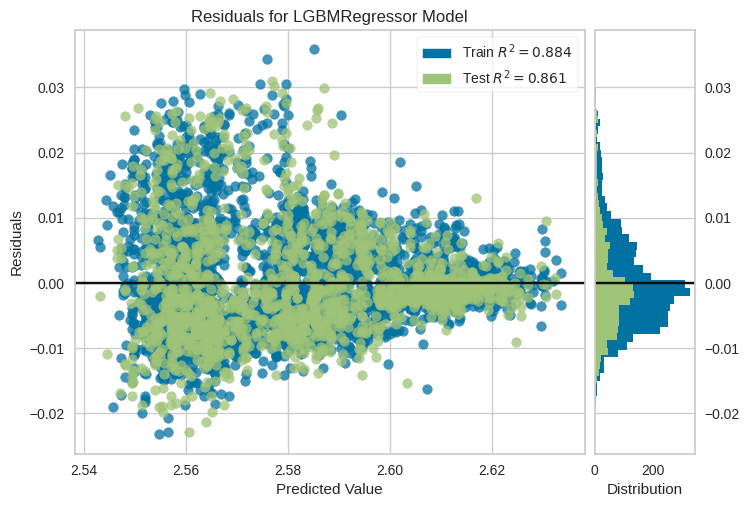

In [57]:
plot_model(tuned_model)

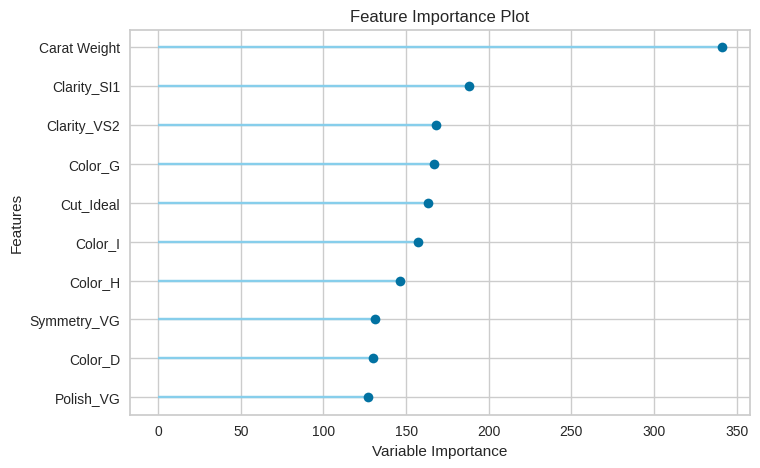

In [58]:
plot_model(tuned_model, plot='feature')

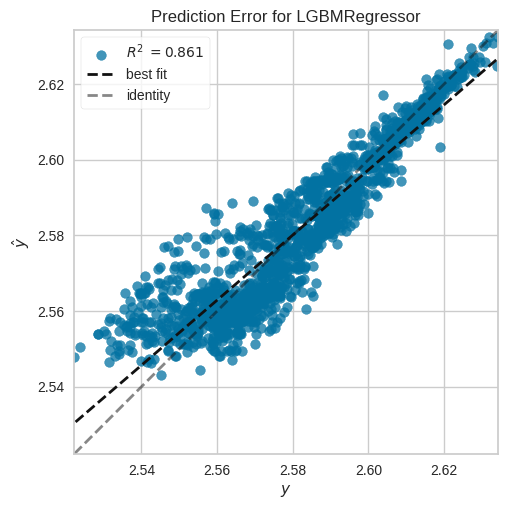

In [59]:
plot_model(tuned_model, plot = 'error')

In [63]:
# finalize the model
final_best = finalize_model(tuned_model)

# save model to disk
save_model(final_best, 'diamond-pipeline')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=FastMemory(location=/tmp/joblib),
          steps=[('target_transformation',
                  TransformerWrapperWithInverse(transformer=TargetTransformer(estimator=PowerTransformer(standardize=False)))),
                 ('numerical_imputer',
                  TransformerWrapper(include=['Carat Weight'],
                                     transformer=SimpleImputer())),
                 ('categorical_imputer',
                  TransformerWrapper(include=['Cut', 'Color', '...
                                     transformer=KBinsDiscretizer(encode='ordinal',
                                                                  strategy='kmeans'))),
                 ('transformation',
                  TransformerWrapper(transformer=PowerTransformer(standardize=False))),
                 ('normalize', TransformerWrapper(transformer=StandardScaler())),
                 ('clean_column_names',
                  TransformerWrapper(transformer=CleanColumnNames())),
           

In [65]:
unseen_predictions = predict_model(final_best, data=data_unseen)
unseen_predictions.head()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Light Gradient Boosting Machine,1690.0591,5821208.7837,2412.7181,0.9434,0.2198,0.1796


,Carat Weight,Cut,Color,Clarity,Polish,Symmetry,Report,Price,prediction_label
0,1.53,Ideal,E,SI1,ID,ID,AGSL,2.657130,9989.907613
1,1.50,Fair,F,SI1,VG,VG,GIA,2.650441,10135.317592
2,1.01,Good,E,SI1,G,G,GIA,2.622831,4791.525236
3,2.51,Very Good,G,VS2,VG,VG,GIA,2.683593,33697.529278
4,1.01,Good,I,SI1,VG,VG,GIA,2.613765,3735.786011


In [66]:
from pycaret.utils.generic import check_metric
check_metric(unseen_predictions.Price, unseen_predictions.prediction_label, 'R2')

-400015739331.2844

In [73]:
data_unseen.columns

Index(['Carat Weight', 'Cut', 'Color', 'Clarity', 'Polish', 'Symmetry',
       'Report', 'Price'],
      dtype='object')

In [75]:
new_data = (
    pd.read_csv('diamonds.csv')
    .rename(columns={
        'carat': 'Carat Weight',
        'cut': 'Cut',
        'color': 'Color',
        'clarity': 'Clarity',
        'depth': 'Depth',
        'table': 'Table',
        'price': 'Price'
    })
    .drop(columns=['x', 'y', 'z'])
)

In [76]:
new_data.head()

,Carat Weight,Cut,Color,Clarity,Depth,Table,Price
0,0.23,Ideal,E,SI2,61.5,55.0,326
1,0.21,Premium,E,SI1,59.8,61.0,326
2,0.23,Good,E,VS1,56.9,65.0,327
3,0.29,Premium,I,VS2,62.4,58.0,334
4,0.31,Good,J,SI2,63.3,58.0,335


In [77]:
saved_final = load_model('diamond-pipeline')

Transformation Pipeline and Model Successfully Loaded


In [31]:
# Assign best_model to models for code simplicity
models = best_model.copy()

# Define dictionaries to contain results
eval_results = {}
model_dict = {}

for i in range(len(models)):

    # Print model name
    model_name = models[i].__class__.__name__
    print(model_name)

    # Get predictions on the test set for the model
    predictions = predict_model(models[i], data=df_test)

    # Actual vs predicted
    y_true = df_test[target]  # Use the 'traffic_volume' column from df_test as the actual values
    y_pred = predictions["prediction_label"]  # Use the 'traffic_volume' column from predictions as the predicted values

    # Calculate MAE, MSE, RMSE, and R-Squared for model evaluation
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)

    # Use rmse as the key indicator for best performance
    eval_results[model_name] = rmse
    model_dict[model_name] = models[i]

# Find the model with the lowest rmse
top_model = min(eval_results, key=eval_results.get)

# Print the result
print("The top performing model on the test dataset:", top_model, ", rmse:", eval_results[top_model])

GradientBoostingRegressor


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Gradient Boosting Regressor,1718.9880,5575804.8259,2361.3142,0.9504,0.2212,0.1888


LGBMRegressor


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Light Gradient Boosting Machine,1597.2378,6361643.6581,2522.2299,0.9434,0.2110,0.1742


XGBRegressor


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Extreme Gradient Boosting,1528.6320,4656135.8999,2157.8081,0.9585,0.2090,0.1701


The top performing model on the test dataset: XGBRegressor , rmse: 2157.8081239702597


In [32]:
!mkdir models

save_path = '/content/models/'
date = datetime.now().strftime("%Y-%m-%d")

# define dependent variables
model_file_name = f'{save_path}{top_model}_{date}'
filename = f'{top_model}_{date}.pkl'

# save model in local path
save_model(model_dict[top_model], model_file_name)

mkdir: cannot create directory ‘models’: File exists
Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=FastMemory(location=/tmp/joblib),
          steps=[('target_transformation',
                  TransformerWrapperWithInverse(transformer=TargetTransformer(estimator=PowerTransformer(standardize=False)))),
                 ('numerical_imputer',
                  TransformerWrapper(include=['Carat Weight'],
                                     transformer=SimpleImputer())),
                 ('categorical_imputer',
                  TransformerWrapper(include=['Cut', 'Color', '...
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
         

In [33]:
#### Model Hyperparameter Tuning ###
model_base = create_model(model_dict[top_model])
tuned_model, tuner = tune_model(model_base, optimize='RMSE', return_tuner = True, n_iter = 20)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.0065,0.0001,0.0087,0.8437,0.0024,0.0025
1,0.0067,0.0001,0.0090,0.8542,0.0025,0.0026
2,0.0072,0.0001,0.0094,0.8447,0.0026,0.0028
3,0.0059,0.0001,0.0076,0.8727,0.0022,0.0023
4,0.0066,0.0001,0.0087,0.8416,0.0025,0.0026
5,0.0069,0.0001,0.0089,0.8650,0.0025,0.0026
6,0.0064,0.0001,0.0085,0.8580,0.0024,0.0025
7,0.0050,0.0000,0.0070,0.8850,0.0020,0.0020
8,0.0066,0.0001,0.0088,0.8519,0.0025,0.0026


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.0065,0.0001,0.0088,0.8412,0.0025,0.0025
1,0.0068,0.0001,0.0092,0.8488,0.0026,0.0027
2,0.0072,0.0001,0.0095,0.8430,0.0027,0.0028
3,0.0060,0.0001,0.0078,0.8659,0.0022,0.0024
4,0.0068,0.0001,0.0090,0.8299,0.0025,0.0027
5,0.0070,0.0001,0.0091,0.8577,0.0025,0.0027
6,0.0065,0.0001,0.0087,0.8498,0.0025,0.0025
7,0.0050,0.0001,0.0072,0.8804,0.0020,0.0020
8,0.0066,0.0001,0.0089,0.8486,0.0025,0.0026


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 20 candidates, totalling 200 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [34]:
saved_model = load_model('/content/models/XGBRegressor_2023-11-02')

Transformation Pipeline and Model Successfully Loaded


In [39]:
predictions = predict_model(saved_model, data=data_unseen)
predictions.head()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Extreme Gradient Boosting,1871.1128,8639974.4392,2939.3833,0.9160,0.2301,0.1859


,Carat Weight,Cut,Color,Clarity,Polish,Symmetry,Report,Price,prediction_label
0,1.53,Ideal,E,SI1,ID,ID,AGSL,2.595101,11713.247070
1,1.50,Fair,F,SI1,VG,VG,GIA,2.588998,11101.933594
2,1.01,Good,E,SI1,G,G,GIA,2.563690,4653.061523
3,2.51,Very Good,G,VS2,VG,VG,GIA,2.619113,31822.080078
4,1.01,Good,I,SI1,VG,VG,GIA,2.555344,3890.281494


In [38]:
#### Final Evaluation ####

# print model name
model_name = tuned_model.__class__.__name__
print(model_name)

# Get predictions on test set for model
predictions = predict_model(tuned_model, data=data_unseen)

# Actual vs predicted
y_true = predictions[target]
y_pred = predictions["prediction_label"]

mae = mean_absolute_error(y_true, y_pred)
mse = mean_squared_error(y_true, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_true, y_pred)

print(f'mae: {mae}')
print(f'mae: {mse}')
print(f'rmse: {rmse}')
print(f'r2: {r2}')

XGBRegressor


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Extreme Gradient Boosting,1871.1128,8639974.4392,2939.3833,0.9160,0.2301,0.1859


mae: 11950.839940733382
mae: 234567534.76693538
rmse: 15315.597760679646
r2: -471673288958.9531


In [40]:
from pycaret.utils.generic import check_metric
check_metric(predictions.Price, predictions.prediction_label, 'R2')

-471673288958.9531

In [41]:
save_model(tuned_model, model_file_name)

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=FastMemory(location=/tmp/joblib),
          steps=[('target_transformation',
                  TransformerWrapperWithInverse(transformer=TargetTransformer(estimator=PowerTransformer(standardize=False)))),
                 ('numerical_imputer',
                  TransformerWrapper(include=['Carat Weight'],
                                     transformer=SimpleImputer())),
                 ('categorical_imputer',
                  TransformerWrapper(include=['Cut', 'Color', '...
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
         